# Manifold graphics in SageMath

This notebook illustrates some plotting capabilities of manifold objects in SageMath.

More examples can be found on the [SageManifolds page](https://sagemanifolds.obspm.fr/examples.html).

In [1]:
%display latex

## The 2-sphere example

Let us consider the sphere $\mathbb{S}^2$. In SageMath, we declare it as a 2-dimensional 
differentiable manifold:

In [2]:
S2 = Manifold(2, 'S^2', latex_name=r'\mathbb{S}^2', start_index=1)
print(S2)

2-dimensional differentiable manifold S^2


We then introduce the standard spherical coordinates $(\theta,\phi)$ as a chart on $\mathbb{S}^2$, denoting the chart as `spher` and the coordinates `th` and `ph`.
We shall be lazy here and consider that the spherical chart covers the whole manifold $\mathbb{S}^2$; this amounts to authorize coordinate singularities:

In [3]:
spher.<th,ph> = S2.chart(r'th:[0,pi]:\theta ph:[0,2*pi]:periodic:\phi')
spher

Chart (S^2, (th, ph))

In [4]:
spher.coord_range()

th: [0, pi]; ph: [0, 2*pi] (periodic)

For 3D plots, we shall require the Euclidian space $\mathbb{E}^3$:

In [5]:
E3.<X,Y,Z> = EuclideanSpace()
E3

Euclidean space E^3

Let us call `cartesian` the chart of Cartesian coordinates $(X,Y,Z)$:

In [6]:
cartesian = E3.cartesian_coordinates()
cartesian

Chart (E^3, (X, Y, Z))

The canonical embedding of $\mathbb{S}^2$ into $\mathbb{E}^3$:

In [7]:
Phi = S2.diff_map(E3, (sin(th)*cos(ph), 
                       sin(th)*sin(ph),
                       cos(th)), 
                  name='Phi', latex_name=r'\Phi')
Phi.display()

Phi: S^2 → E^3
   (th, ph) ↦ (X, Y, Z) = (cos(ph)*sin(th), sin(ph)*sin(th), cos(th))

## Plot of a chart

Each chart is endowed with a `plot()` method.
For instance, we may use it to plot the chart of spherical coordinates plotted in terms 
of itself:

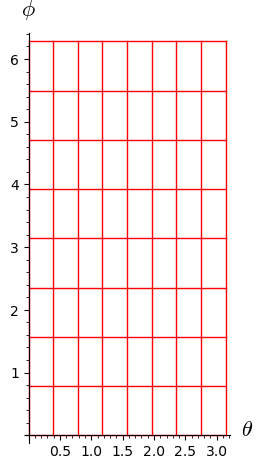

In [8]:
spher.plot(chart=spher)

More intersting is to the plot the chart of spherical coordinates in terms of $\mathbb{E}^3$'s Cartesian coordinates, via the embedding $\Phi:\; \mathbb{S}^2\to\mathbb{E}^3$:

In [9]:
spher.plot(chart=cartesian, mapping=Phi)

Graphics3d Object

For a better image, let us increase the number of coordinate values:

In [10]:
spher.plot(chart=cartesian, mapping=Phi, number_values=11)

Graphics3d Object

One can customize the color of coordinate lines:

In [11]:
spher.plot(chart=cartesian, mapping=Phi, number_values=11, 
           color={th: 'red', ph: 'green'})

Graphics3d Object

One can fix the value of some coordinates, thereby obtaining a partial plot:

In [12]:
spher.plot(chart=cartesian, mapping=Phi, number_values=11, 
           color={th: 'red', ph: 'green'},
           fixed_coords={th: pi/4})

Graphics3d Object

or limit the range of some coordinates:

In [13]:
spher.plot(chart=cartesian, mapping=Phi, number_values=11, 
           color={th: 'red', ph: 'green'},
           ranges={ph:(0, pi)})

Graphics3d Object

One can also restrict the coordinates of the ambiant chart; here is a example of plot of the chart `spher` in terms of the coordinates $(X,Y)$ of $\mathbb{E}^3$:

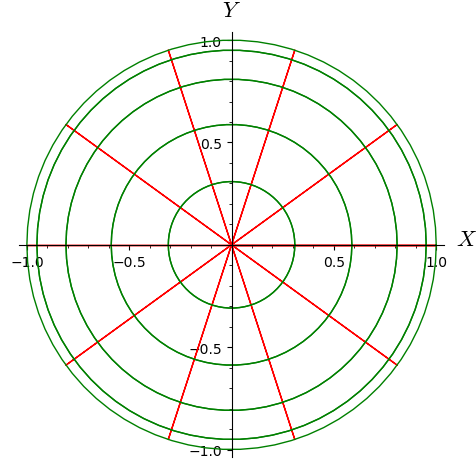

In [14]:
spher.plot(chart=cartesian, mapping=Phi, number_values=11, 
           color={th: 'red', ph: 'green'},
           ambient_coords=(X, Y))

Same thing with only the coordinates $(X,Z)$:

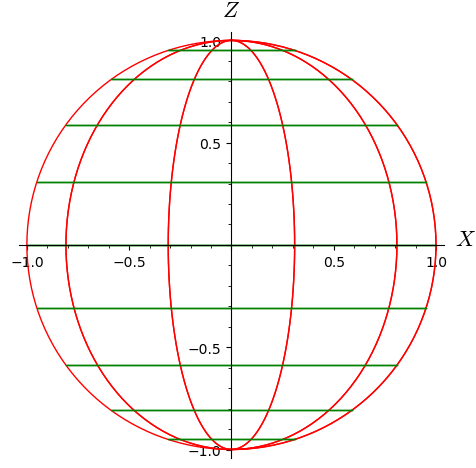

In [15]:
spher.plot(chart=cartesian, mapping=Phi, number_values=11, 
           color={th: 'red', ph: 'green'},
           ambient_coords=(X, Z))

Let us introduce the chart of **stereographic coordinates from the North pole**:

In [16]:
stereoN.<x,y> = S2.chart()
stereoN

Chart (S^2, (x, y))

In [17]:
spher_to_stereoN = spher.transition_map(stereoN, 
                                        (sin(th)*cos(ph)/(1-cos(th)),
                                         sin(th)*sin(ph)/(1-cos(th))))
spher_to_stereoN.display()

x = -cos(ph)*sin(th)/(cos(th) - 1)
y = -sin(ph)*sin(th)/(cos(th) - 1)

In [18]:
spher_to_stereoN.set_inverse(2*atan(1/sqrt(x^2+y^2)), atan2(-y,-x)+pi)

Check of the inverse coordinate transformation:
  th == 2*arctan(sqrt(-cos(th) + 1)/sqrt(cos(th) + 1))  **failed**
  ph == pi + arctan2(sin(ph)*sin(th)/(cos(th) - 1), cos(ph)*sin(th)/(cos(th) - 1))  **failed**
  x == x  *passed*
  y == y  *passed*
NB: a failed report can reflect a mere lack of simplification.


Plot of spherical coordinate in terms of the stereographic ones:

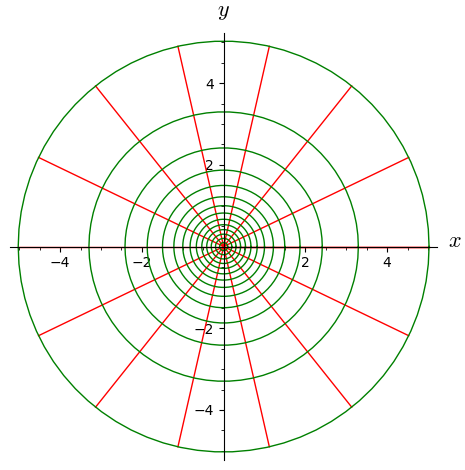

In [19]:
spher.plot(chart=stereoN, number_values=15, ranges={th: (pi/8,pi)},
           color={th: 'red', ph: 'green'})

Plot of stereographic coordinates in terms of spherical ones:

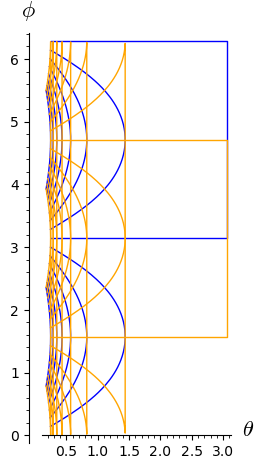

In [20]:
stereoN.plot(chart=spher, number_values=15, plot_points=200,
             color={x: 'blue', y: 'orange'})

The expression of the embedding $\Phi$ in terms of the stereographic coordinates is computed by Sage:

In [21]:
Phi.display()

Phi: S^2 → E^3
   (th, ph) ↦ (X, Y, Z) = (cos(ph)*sin(th), sin(ph)*sin(th), cos(th))
   (x, y) ↦ (X, Y, Z) = (2*x/(x^2 + y^2 + 1), 2*y/(x^2 + y^2 + 1), (x^2 + y^2 - 1)/(x^2 + y^2 + 1))

This means that we can use $\Phi$ for a 3D view of the stereographic chart:

In [22]:
stereoN.plot(chart=cartesian, mapping=Phi, number_values=25,
             color={x: 'blue', y: 'orange'})

Graphics3d Object

The hole at the North pole is due to the default limitation to $[-8,8]$ for the plot range of coordinates that span the whole real line. We can change it to $[-20, 20]$ via the argument `max_range`:

In [23]:
stereoN.plot(chart=cartesian, mapping=Phi, number_values=25,
             color={x: 'blue', y: 'orange'},
             max_range=20, plot_points=200)

Graphics3d Object

View in terms of the coordinates $(X,Z)$ only:

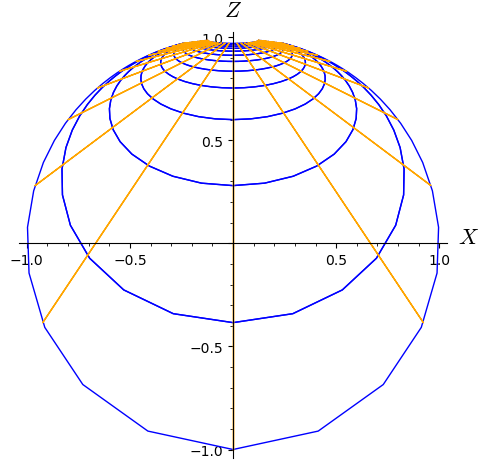

In [24]:
stereoN.plot(chart=cartesian, mapping=Phi, number_values=25,
             color={x: 'blue', y: 'orange'},
             ambient_coords=(X,Z))

## Plot of a point

Points on manifolds are introduced via SageMath standard parent/element syntax: `element = parent(<data specifying the element>)`. For instance, the North pole is defined as

In [25]:
N = S2((0, 0), chart=spher, name='N')
print(N)

Point N on the 2-dimensional differentiable manifold S^2


In [26]:
spher(N)

(0, 0)

In [27]:
sph_plot = spher.plot(chart=cartesian, mapping=Phi, number_values=11,
                      color='grey', label_axes=False)
sph_plot

Graphics3d Object

Points are endowed with a `plot` method:

In [28]:
N.plot(chart=cartesian, mapping=Phi) + sph_plot

Graphics3d Object

In [29]:
S = S2((0, 0), chart=stereoN, name='S')

In [30]:
S.plot(chart=cartesian, mapping=Phi) + sph_plot

Graphics3d Object

## Plot of a vector field

In [31]:
spher.frame()

Coordinate frame (S^2, (∂/∂th,∂/∂ph))

In [32]:
stereoN.frame()

Coordinate frame (S^2, (∂/∂x,∂/∂y))

In [33]:
v = S2.vector_field({(stereoN.frame(), stereoN): [1, 0]}, name='v')
v.display(stereoN)

v = ∂/∂x

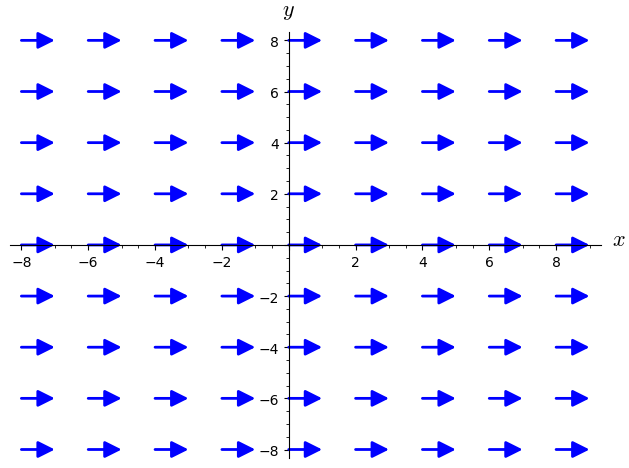

In [34]:
v.plot(chart=stereoN, chart_domain=stereoN)

In [35]:
v_plot = v.plot(chart=cartesian, mapping=Phi, chart_domain=spher, 
                ranges={th: (0.01, 3.14)},
                number_values=11, scale=0.2) + sph_plot
v_plot

Graphics3d Object

In [36]:
w = S2.vector_field({(stereoN.frame(), stereoN): [0, 1]}, name='w')
w.display(stereoN)

w = ∂/∂y

In [37]:
w.plot(chart=cartesian, mapping=Phi, chart_domain=spher, 
                ranges={th: (0.01, 3.14)}, color='red',
                number_values=11, scale=0.2) + v_plot

Graphics3d Object

## Plot of a curve

In [38]:
R.<t> = manifolds.RealLine() 
c = S2.curve({spher: [2*atan(exp(-t/10)), t]}, (t, -oo, +oo), name='c')
c.display()

c: ℝ → S^2
   t ↦ (th, ph) = (2*arctan(e^(-1/10*t)), t)
   t ↦ (x, y) = (cos(t)*e^(1/10*t), e^(1/10*t)*sin(t))

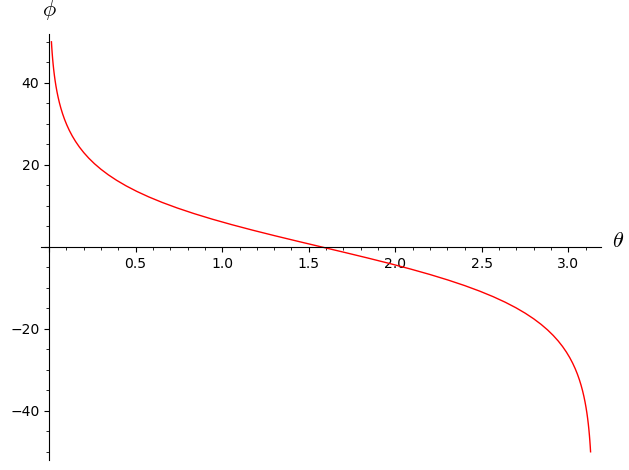

In [39]:
c.plot(chart=spher, prange=(-50, 50))

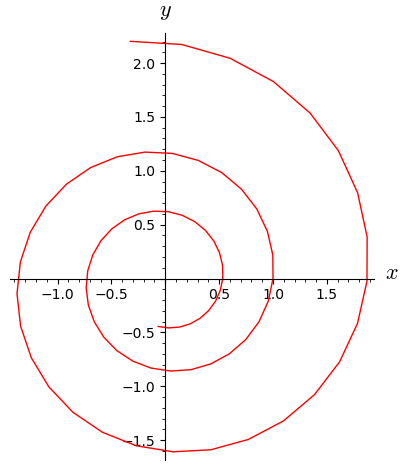

In [40]:
c.plot(chart=stereoN, aspect_ratio=1)

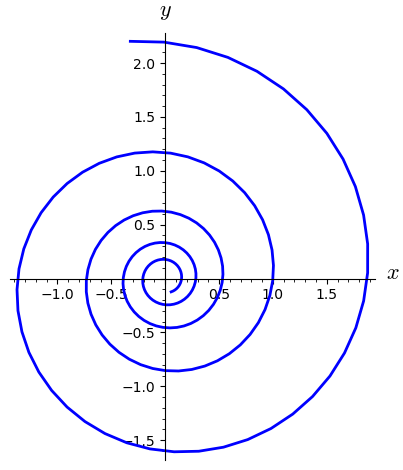

In [41]:
c.plot(chart=stereoN, aspect_ratio=1, prange=(-20, 8), plot_points=200,
       color='blue', thickness=2)

In [42]:
c_plot = c.plot(chart=cartesian, mapping=Phi, max_range=40, plot_points=400, 
                thickness=3) + sph_plot
c_plot

Graphics3d Object

In [43]:
vc = c.tangent_vector_field()
vc.display()

c' = -1/5*e^(1/10*t)/(e^(1/5*t) + 1) ∂/∂th + ∂/∂ph

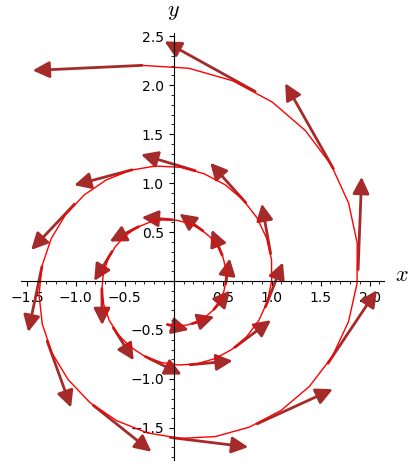

In [44]:
vc.plot(chart=stereoN, number_values=30, scale=0.5, color='brown') \
 + c.plot(chart=stereoN, aspect_ratio=1)

In [45]:
vc.plot(chart=cartesian, mapping=Phi, ranges={t: (-20, 20)}, 
        number_values=30, scale=0.5, color='brown') + c_plot

Graphics3d Object

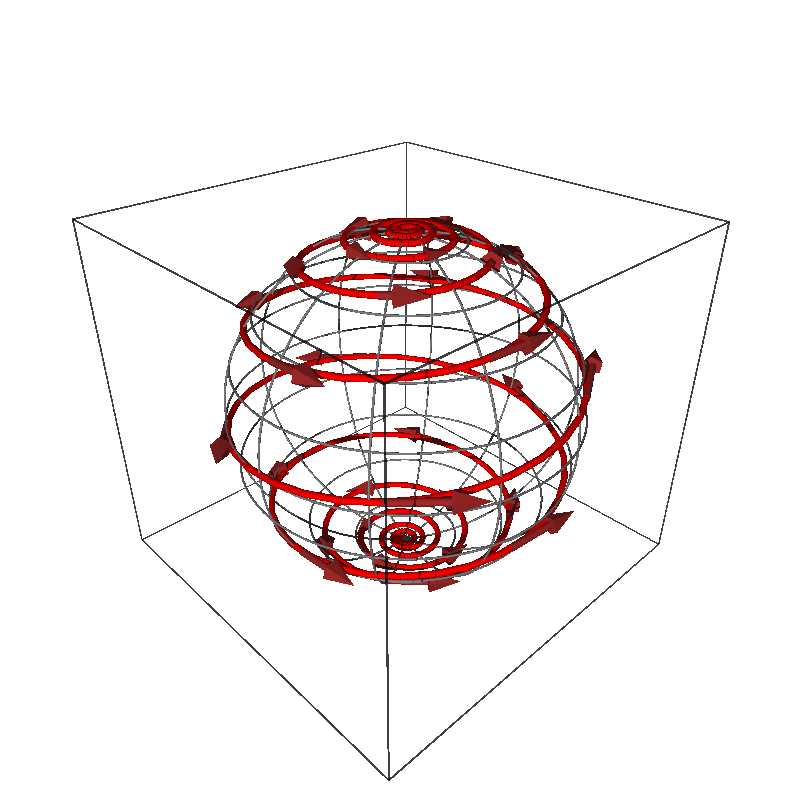

In [46]:
show(_, viewer='tachyon', aspect_ratio=1, figsize=8)

Other examples of manifold plots are [here](https://sagemanifolds.obspm.fr/gallery.html).